<div style="text-align:center;margin-bottom:50px;">
    <img src="img/LogoSingleRow.png" style="max-width:600px;">
</div>

# Classification with PyCaret


## Imports and dataset loading

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br><br>

## Data cleaning

In [5]:
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

gender_mapper = {'male': 0, 'female': 1}
data['Sex'].replace(gender_mapper, inplace=True)

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]
data = data.rename(columns={'Title': 'Title_Unusual'})
data.drop('Name', axis=1, inplace=True)

data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']]
data.drop('Cabin', axis=1, inplace=True)

emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Embarked', axis=1, inplace=True)

data['Age'] = data['Age'].fillna(int(data['Age'].mean()))

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


<br><br>

## Model setup

In [7]:
from pycaret.classification import * 

In [8]:
clf = setup(data, target='Survived', session_id=42)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 11)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.825100,0.866500,0.736800,0.797900,0.763400,0.625500
1,Ridge Classifier,0.821800,0.000000,0.732600,0.795400,0.759100,0.618500
2,CatBoost Classifier,0.820300,0.865700,0.728300,0.797100,0.756900,0.615300
3,Gradient Boosting Classifier,0.818600,0.858500,0.724100,0.795100,0.753700,0.611300
4,Random Forest Classifier,0.817200,0.849000,0.715800,0.790600,0.748500,0.606000
5,Linear Discriminant Analysis,0.816900,0.859700,0.732600,0.784200,0.754400,0.609100
6,Logistic Regression,0.812300,0.863200,0.736800,0.771200,0.750400,0.600500
7,Extreme Gradient Boosting,0.812200,0.865600,0.715800,0.782400,0.744100,0.596800
8,Ada Boost Classifier,0.808900,0.835700,0.737000,0.765400,0.747000,0.594200
9,Extra Trees Classifier,0.788300,0.831700,0.703300,0.738500,0.717200,0.548800


In [10]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8730,0.9135,0.7917,0.8636,0.8261,0.7264
1,0.7619,0.8697,0.5833,0.7368,0.6512,0.4741
2,0.7778,0.8456,0.6667,0.7273,0.6957,0.5212
3,0.7903,0.9220,0.8261,0.6786,0.7451,0.5699
4,0.8548,0.8739,0.7083,0.8947,0.7907,0.6819
5,0.9032,0.8991,0.8333,0.9091,0.8696,0.7929
6,0.8548,0.8706,0.7500,0.8571,0.8000,0.6869
7,0.7903,0.7588,0.6667,0.7619,0.7111,0.5477
8,0.8871,0.8914,0.8333,0.8696,0.8511,0.7602
9,0.7581,0.8202,0.7083,0.6800,0.6939,0.4940


<br><br>

## Model visualization and interpretation

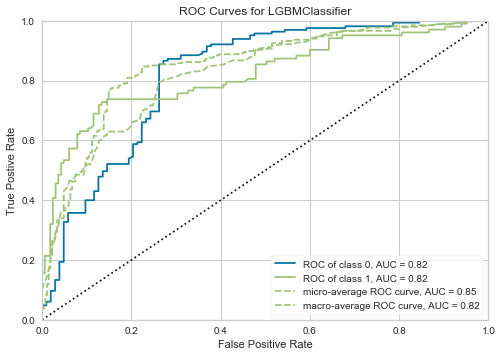

In [14]:
plot_model(model)

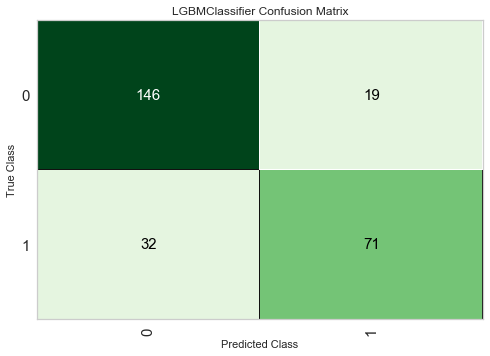

In [15]:
plot_model(model, 'confusion_matrix')

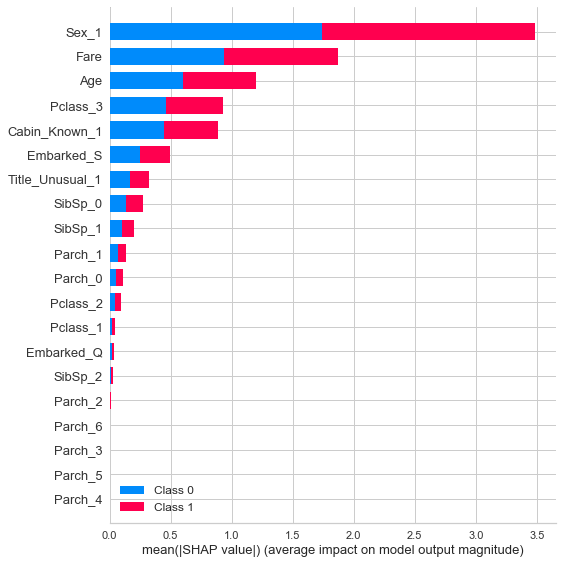

In [19]:
interpret_model(model)

<br><br>

## Predictions and model saving

In [20]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8097,0.821,0.6893,0.7889,0.7358,0.5881


In [21]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
save_model(model, 'titanic_lgbm')

Transformation Pipeline and Model Succesfully Saved
